# Customer churn prediction in Telecom industry

## Section 1 : Business Problem - Telecom Churn


<center><img src="https://www.cleartouch.in/wp-content/uploads/2022/11/Customer-Churn.png" width=500/></center>

Telecom companies have the power to transform customer retention through data-driven churn prediction, unlocking the ability to identify at-risk customers before they leave. By leveraging machine learning and analyzing customer behavior, telcos can take early, targeted action to prevent churn, creating personalized experiences for different customer segments. High-value customers can receive specialized care, while low-usage customers might benefit from promotions tailored to their needs. Enhancing customer experience, proactive outreach, and personalized offers not only build loyalty but also significantly reduce churn. Additionally, continuous monitoring and adaptation to evolving customer preferences ensure telcos stay ahead in an ever-changing market. The combination of data insights and proactive strategies empowers companies to create stronger customer relationships, reduce churn, and drive long-term success.

### 1.1 Objective of the Hands-On Session - Model Evaluation and Generalization

1. Model Evaluation:

  Participants will learn how to evaluate machine learning models beyond simple accuracy, especially when dealing with imbalanced datasets such as customer churn data.

2. Generalization:

  Building models that generalize well to unseen data is critical for avoiding overfitting. Participants will be introduced to key techniques that ensure robust model performance.

3. Handling Imbalanced Data with SMOTE:

  Given the imbalanced nature of the telecom churn dataset, participants will learn how to handle this imbalance effectively through the SMOTE (Synthetic Minority Over-sampling Technique).

4. Feature Interpretation Using LIME and SHAP:

  To build trust in machine learning models and ensure they can be understood and explained, participants will use LIME and SHAP to interpret the model’s predictions.

### 1.2 Understanding and Addressing Customer Churn


* The head of analytics at a telecom company is facing a critical issue: customer churn. The company is losing a significant number of customers, and it's becoming evident that current strategies for customer retention are not effective. This issue is not only reducing revenue but also increasing the cost of acquiring new customers.

* The analytics team has been tasked with addressing the churn problem, but the path forward is challenging. The first step is to analyze the available customer data to understand why customers are leaving and to predict when they are likely to churn. However, it quickly becomes clear that predicting customer churn is far from straightforward.

------------------------------------------------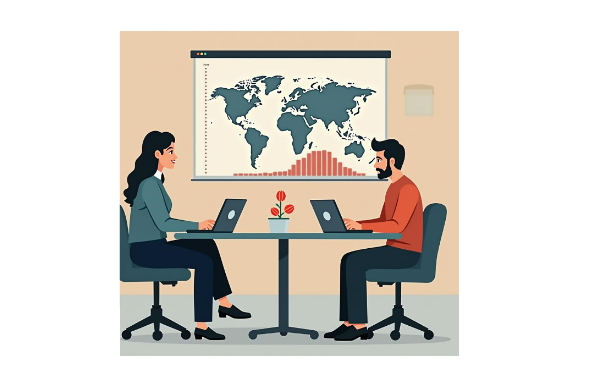----------------------------------------------

### 1.3 Challenges:

1. **Data Imbalance:**

  The dataset David is working with is highly imbalanced, where only a small percentage of customers churn. This imbalance makes it difficult to rely on traditional metrics like accuracy, as a model predicting “no churn” for everyone might seem accurate but would miss identifying at-risk customers.

2. **Choosing the Right Metrics:**

  Accuracy is misleading for churn prediction. David must focus on Recall (correctly identifying churners) and Precision (not mislabeling loyal customers) to ensure that the company doesn't waste resources on false positives or miss out on real churners.

3. **Overfitting vs. Underfitting:**

  Balancing model complexity is crucial. Simple models (underfitting) fail to capture important patterns, while complex models (overfitting) may perform well on training data but poorly on new customers. David needs a model that generalizes well to unseen data.

4. **Interpreting Model Predictions:**

  Predicting churn is only part of the solution. David must also understand why customers are predicted to churn, using tools like LIME and SHAP to interpret model outputs. This will help the company take meaningful actions based on the predictions.



## Section 2: Data Preparation

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_excel('/content/Telco_customer_churn_dataset.xlsx')

In [ ]:
# View the data
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
# Let's look into the summary statistics of numeric columns,
# and frequency distribution of categorical columns, all at once!
df.describe(include='all')

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
count,7043,7043.0,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043,...,7043,7043,7043,7043.000000,7043.0,7043,7043.000000,7043.000000,7043.000000,1869
unique,7043,NaN,1,1,1129,NaN,1652,NaN,NaN,2,...,3,2,4,NaN,6531.0,2,NaN,NaN,NaN,20
top,3668-QPYBK,NaN,United States,California,Los Angeles,NaN,"33.964131, -118.272783",NaN,NaN,Male,...,Month-to-month,Yes,Electronic check,NaN,20.2,No,NaN,NaN,NaN,Attitude of support person
freq,1,NaN,7043,7043,305,NaN,5,NaN,NaN,3555,...,3875,4171,2365,NaN,11.0,5174,NaN,NaN,NaN,192
mean,NaN,1.0,NaN,NaN,NaN,93521.964646,NaN,36.282441,-119.798880,NaN,...,NaN,NaN,NaN,64.761692,NaN,NaN,0.265370,58.699418,4400.295755,NaN
std,NaN,0.0,NaN,NaN,NaN,1865.794555,NaN,2.455723,2.157889,NaN,...,NaN,NaN,NaN,30.090047,NaN,NaN,0.441561,21.525131,1183.057152,NaN
min,NaN,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,...,NaN,NaN,NaN,18.250000,NaN,NaN,0.000000,5.000000,2003.000000,NaN
25%,NaN,1.0,NaN,NaN,NaN,92102.000000,NaN,34.030915,-121.815412,NaN,...,NaN,NaN,NaN,35.500000,NaN,NaN,0.000000,40.000000,3469.000000,NaN
50%,NaN,1.0,NaN,NaN,NaN,93552.000000,NaN,36.391777,-119.730885,NaN,...,NaN,NaN,NaN,70.350000,NaN,NaN,0.000000,61.000000,4527.000000,NaN
75%,NaN,1.0,NaN,NaN,NaN,95351.000000,NaN,38.224869,-118.043237,NaN,...,NaN,NaN,NaN,89.850000,NaN,NaN,1.000000,75.000000,5380.500000,NaN


###Step 1: Dropping Irrelevant Columns

  We are dropping the following columns:`CustomerID`, `Count`, `Country`, `State`, `City`, `Zip Code`, `Lat Long`, `Churn Label`, `Churn Reason`, and `Churn Score` because they are either:

1. **Identifiers** (e.g., `CustomerID`) that don't provide meaningful patterns for prediction.
2. **Geographical information** From the above frequency distribution, we see that State and City are unique values, and hence do not contain any predictive information.
3. **Post-churn information** (e.g., `Churn Reason`, `Churn Score`) that could leak data and artificially improve the model's performance.

In [ ]:
# Step 1: Dropping Irrelevant Columns
# Dropping columns that are not useful for modeling
columns_to_drop = ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long',
                   'Latitude','Longitude','Churn Label', 'Churn Reason', 'Churn Score']
df_cleaned = df.drop(columns=columns_to_drop)

###Step 2: Train-Test Split (80:20)

We split the dataset into 80% training data to build the model and 20% test data to evaluate it.

* **Stratify by y** ensures that the class distribution (churners and non-churners) is consistent in both the training and test sets, preventing data imbalance issues during model training.

In [ ]:
# Step 2: Train-Test Split (80:20)
# Extracting features (X) and target (y)
X = df_cleaned.drop('Churn Value', axis=1)
y = df_cleaned['Churn Value']
print(X.shape, y.shape)

# Before splitting the data, save the column names of X for future reference;
# as train_test_split converts the corresponding data into numpy arrays
X_colnames = X.columns
print(X_colnames.shape)

# Perform 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


(7043, 20) (7043,)
(20,)


###Step 3: Handling missing values

Use a SimpleImputer for missing values imputation.

In [ ]:
# step-3 Handling Missing Values
# 'Total Charges' column has some missing or invalid values. Convert it to numeric and handle missing values.
from sklearn.impute import SimpleImputer

# Convert 'Total Charges' to numeric, coercing invalid values to NaN
X_train['Total Charges'] = pd.to_numeric(X_train['Total Charges'], errors='coerce')
X_test['Total Charges'] = pd.to_numeric(X_test['Total Charges'], errors='coerce')

# Initialize the SimpleImputer with a strategy to fill missing values with the median
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data and transform both training and test data
X_train['Total Charges'] = imputer.fit_transform(X_train[['Total Charges']])
X_test['Total Charges'] = imputer.transform(X_test[['Total Charges']])


###Step 4: Remove duplicate rows

In [ ]:
# Step-4 Removing Duplicates
# Removing any duplicate rows in both training and test sets

X_train.drop_duplicates(inplace=True)
X_test.drop_duplicates(inplace=True)

###Step 5: Encode categorical variables

In [ ]:
# Step-5 Encoding Categorical Variables
# We will use LabelEncoder for simplicity

label_enc = LabelEncoder()

for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = label_enc.fit_transform(X_train[column])

for column in X_test.select_dtypes(include=['object']).columns:
    X_test[column] = label_enc.fit_transform(X_test[column])


###Step 6: Standardization - Feature scaling


We are using StandardScaler to standardize the data. The StandardScaler transforms the features by scaling them to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the model, regardless of their original scales.

In [ ]:
# 3.4 Standardization (Feature Scaling)
# Standardizing features (scaling them to mean=0 and variance=1)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [ ]:
# Final dataset description after preprocessing
print("\nTraining Set Shape:", X_train_scaled.shape)
print("Test Set Shape:", X_test_scaled.shape)

# Display the first few rows of the scaled training set
print("\nFirst Few Rows of Scaled Training Data:")
print(X_train_scaled.head())

# Display the first few rows of the training target variable
print("\nFirst Few Rows of Training Target:")
print(y_train.head())



Training Set Shape: (5634, 20)
Test Set Shape: (1409, 20)

First Few Rows of Scaled Training Data:
     Gender  Senior Citizen   Partner  Dependents  Tenure Months  \
0  0.994336       -0.441773 -0.969234   -0.547954       0.102371   
1  0.994336       -0.441773  1.031742    1.824970      -0.711743   
2  0.994336       -0.441773  1.031742    1.824970      -0.793155   
3 -1.005696       -0.441773  1.031742   -0.547954      -0.263980   
4  0.994336       -0.441773  1.031742    1.824970      -1.281624   

   Phone Service  Multiple Lines  Internet Service  Online Security  \
0      -3.013090        0.055253         -1.183116        -0.919558   
1       0.331885       -0.999989          0.174179         1.403666   
2      -3.013090        0.055253         -1.183116         1.403666   
3       0.331885       -0.999989         -1.183116        -0.919558   
4       0.331885       -0.999989         -1.183116        -0.919558   

   Online Backup  Device Protection  Tech Support  Streaming TV 

## Section 3: Dataset imbalance

* Upon reviewing the dataset, it becomes clear that there is a significant class imbalance—far fewer customers churn compared to those who remain loyal. This imbalance could potentially skew the results, particularly if accuracy is used as the primary performance metric. A high accuracy score might appear favorable, but it could be misleading if the model predominantly predicts customers as non-churners.

* To properly evaluate the model, it's crucial to first analyze the class distribution of churners and non-churners and choose appropriate metrics.

###Step 1: Analyze the Dataset to Show Class Imbalance

Let’s start by analyzing the class distribution of the target variable (Churn Value). This will help to understand the imbalance in his dataset.

In [ ]:
# Analyzing the distribution of churners (1) vs. non-churners (0) in the training set
churn_distribution = y_train.value_counts()

# Display the class distribution
print("\nClass Distribution in the Training Set:")
print(churn_distribution)

# Calculating the percentage of each class
churn_percentage = (churn_distribution / len(y_train)) * 100
print("\nPercentage Distribution of Churn vs. Non-Churn:")
print(churn_percentage)



Class Distribution in the Training Set:
Churn Value
0    4139
1    1495
Name: count, dtype: int64

Percentage Distribution of Churn vs. Non-Churn:
Churn Value
0    73.464679
1    26.535321
Name: count, dtype: float64


From the output, we can see that only 27% of his customers churn, while 73% remain loyal. This imbalance could cause a model that predicts everyone as non-churners to have a seemingly high accuracy, even though it's not truly useful for identifying churners.

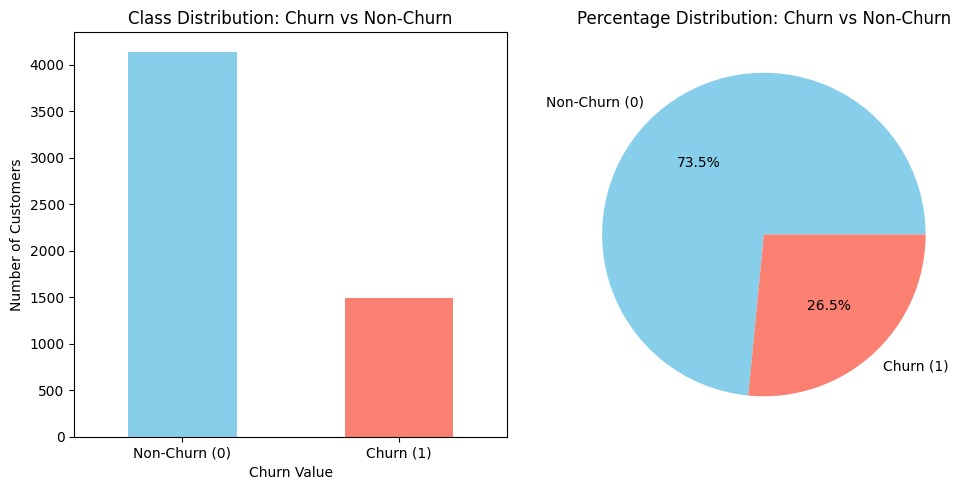

In [ ]:
import matplotlib.pyplot as plt

# Analyzing the distribution of churners (1) vs. non-churners (0) in the training set
churn_distribution = y_train.value_counts()

# Bar plot for class distribution
plt.figure(figsize=(10, 5))

# Creating the bar plot
plt.subplot(1, 2, 1)
churn_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution: Churn vs Non-Churn")
plt.xticks([0, 1], ['Non-Churn (0)', 'Churn (1)'], rotation=0)
plt.ylabel("Number of Customers")

# Pie chart for class distribution
plt.subplot(1, 2, 2)
plt.pie(churn_distribution, labels=['Non-Churn (0)', 'Churn (1)'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Percentage Distribution: Churn vs Non-Churn")

# Show the plots
plt.tight_layout()
plt.show()


**Observation:**  If we simply trains a model and evaluates it based on accuracy, we might get high accuracy scores even if the model is terrible at predicting churners. For example, if a model predicts that no customers churn, it will still be correct 73% of the time (since 73% of the customers don’t churn).

###Step 2: Example scenario for accuracy

Let's assume a model has predicted all values as non-churn and find out its accuracy.

In [ ]:
# Simulating a model that predicts no customer churns (all predictions are 0)
y_pred_dummy = [0] * len(y_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_dummy)
print(f"Dummy Model Accuracy: {accuracy * 100:.2f}%")

Dummy Model Accuracy: 73.46%


###Observation:
* We can notice that even though this dummy model predicted no churn, it still achieved a 73% accuracy—because 73% of the customers didn’t churn anyway. This shows how accuracy can give a false sense of success when working with imbalanced data.

* The accuracy, in this case, could be deceptive. Instead, we should look at more nuanced metrics like `Precision`, `Recall`, and `F1-score` to ensure his model is actually good at identifying churners.

###Step 3: Selection between precision, recall & F1-score using a simple logistic regression model

Before making a choice between Precision, Recall, and F1-score, We must understand the cost of reducing False Negatives (FN) versus False Positives (FP).

1. **Reducing False Negatives:**
  False negatives represent actual churners that the model failed to identify. If these customers are missed, they may leave without the company being able to take any action to retain them, resulting in lost revenue and missed retention opportunities.

  * False Negatives (FN): Churners who are wrongly predicted as non-churners.

  * Impact of Reducing False Negatives: By improving Recall, the model will correctly identify more churners (reducing FN). However, increasing Recall often comes at the cost of reducing Precision, meaning more false positives (loyal customers wrongly predicted to churn) could occur.

2. **Reducing False Positives:**
False positives occur when loyal customers are mistakenly identified as churners. This can lead to unnecessary spending on retention strategies for customers who were never at risk of leaving. While reducing churn is important, wasting resources on customers who don't need intervention is undesirable.

  * False Positives (FP): Loyal customers wrongly predicted to churn.

  * Impact of Reducing False Positives: By improving Precision, the model becomes more accurate in identifying true churners (reducing FP). However, increasing Precision often comes at the cost of reducing Recall, which could result in missing more actual churners (increasing FN).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict churn on the test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.65
Recall: 0.58
F1-Score: 0.61


### Interpretation:

1. Precision (0.65): Prioritizes reducing false positives. Fewer customers would be targeted with retention efforts, but there is a risk of missing some actual churners.

  Business Scenario: The company wants to avoid spending too much money on loyal customers (false positives). The cost of wrongly targeting a customer is high, and it's preferable to miss some churners rather than over-target.

2. Recall (0.59): Prioritizes reducing false negatives. More churners would be caught, but there is a risk of wasting resources on loyal customers who are not at risk of churning.

  Business Scenario: If retaining churners is a top priority and missing even one churner could result in significant revenue loss, the company might prioritize Recall over Precision. In this case, it's more acceptable to mistakenly target loyal customers than to miss churners.

3. F1-Score (0.61): Balances both Precision and Recall, offering a way to catch churners without overly sacrificing one metric for the other.

  Business Scenario: The company seeks a balance between retaining churners and avoiding unnecessary spending on loyal customers. The F1-score is useful in cases where both false positives and false negatives need to be minimized without prioritizing one over the other.



### Conclusion: Choice - Focus on recall

Recall is the most appropriate metric for this business.

- It's fine to spend some resources at the cost of identifying customers at risk of churning (through Recall).

By focusing on recall, onecan ensure that his model is both effective and efficient in addressing the churn problem, leading to better decision-making and optimized customer retention strategies.

## Section 4: Exploring the bias-variance tradeoff

1. Experiments are conducted with different models, ranging from simple to complex, to find the balance between underfitting and overfitting. It is understood that underfitted models may miss important patterns, while overfitted models perform well on the training data but fail to generalize to new data. The goal is to understand how model complexity impacts performance.

2. This exploration focuses on the Bias-Variance Tradeoff using two models: `K-Nearest Neighbors (KNN)` and `Random Forest`. Deliberate adjustments to the complexity of the models will create underfitted and overfitted scenarios, which will be evaluated using Precision, Recall, and F1-score.

### 4.1 Underfitted Random forest model

To underfit Random forest, we limit the tree depth significantly (max_depth=2), which will cause the model to miss patterns.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate model performance on both training and test sets
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training Set Performance
    y_train_pred = model.predict(X_train)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    cm_train = confusion_matrix(y_train, y_train_pred)

    print("Training Set Performance:")
    print(f"Precision: {precision_train:.2f}")
    print(f"Recall: {recall_train:.2f}")
    print(f"F1-Score: {f1_train:.2f}")
    print(f"Confusion Matrix:\n{cm_train}\n")

    # Test Set Performance
    y_test_pred = model.predict(X_test)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    print("Test Set Performance:")
    print(f"Precision: {precision_test:.2f}")
    print(f"Recall: {recall_test:.2f}")
    print(f"F1-Score: {f1_test:.2f}")
    print(f"Confusion Matrix:\n{cm_test}\n")

# Underfitting Random Forest with low max_depth (underfitted model)
rf_underfit = RandomForestClassifier(random_state=42, max_depth=2)
rf_underfit.fit(X_train_scaled, y_train)

# Evaluate the underfitted Random Forest on training and test sets
print("=== Underfitting Random Forest ===")
evaluate_model(rf_underfit, X_train_scaled, y_train, X_test_scaled, y_test)


=== Underfitting Random Forest ===
Training Set Performance:
Precision: 0.81
Recall: 0.16
F1-Score: 0.26
Confusion Matrix:
[[4083   56]
 [1259  236]]

Test Set Performance:
Precision: 0.70
Recall: 0.17
F1-Score: 0.28
Confusion Matrix:
[[1008   27]
 [ 310   64]]



Interpretation of the Random forest Results:

1. Recall:
  * Training Set: Recall is 0.16, meaning the model is correctly identifying only 16% of actual churners. This indicates that the model is failing to capture churn patterns during training.
  * Test Set: Similarly, Recall is 0.17, meaning only 17% of churners are being correctly predicted in the test set. The model is significantly underperforming in detecting churners, even on unseen data.

2. Precision:
  Precision is relatively high, especially on the test set (0.7). This indicates that most of the customers predicted to churn are indeed churners. However, the low recall suggests the model is missing many actual churners (high False Negatives).

3. F1-Score:
  The F1-Score, which balances precision and recall, is very low at 0.28, confirming that the model is struggling to predict churn correctly.

### Interpretation:
The model is underfitting, as evidenced by the low recall and F1-Score. This means it is too simple to capture important churn patterns.

####Solutions:
* **Increase model complexity**: Consider increasing the depth of the Random Forest or trying more complex models like XGBoost to capture more meaningful patterns in the data.
* Use **SMOTE** to handle class imbalance, as the model is failing to detect churners (minority class).
* **Tune hyperparameters** to find an optimal balance between underfitting and overfitting.

### 4.2 Underfitted K-NN model

We deliberately underfit the K-NN model by setting a large value for n_neighbors (e.g., 20), making the model less sensitive to local patterns and therefore likely to miss key patterns in the data.

In [ ]:
# Ensure X_train_scaled and X_test_scaled are NumPy arrays
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

X_train_scaled = np.ascontiguousarray(X_train_scaled)
X_test_scaled = np.ascontiguousarray(X_test_scaled)


In [ ]:
# Underfitting KNN with a large number of neighbors (n_neighbors=350)
knn_underfit = KNeighborsClassifier(n_neighbors=1000)
knn_underfit.fit(X_train_scaled, y_train)

# Evaluate the underfitted KNN on training and test sets
print("=== Underfitting KNN (High n_neighbors) ===")
evaluate_model(knn_underfit, X_train_scaled, y_train, X_test_scaled, y_test)


=== Underfitting KNN (High n_neighbors) ===
Training Set Performance:
Precision: 0.68
Recall: 0.39
F1-Score: 0.49
Confusion Matrix:
[[3861  278]
 [ 913  582]]

Test Set Performance:
Precision: 0.66
Recall: 0.39
F1-Score: 0.49
Confusion Matrix:
[[959  76]
 [229 145]]



###Interpretation:

Recall:

* Training Set: 0.39 - The model identifies only 39% of actual churners, indicating difficulty in detecting churners.
* Test Set: 0.39 - The model fails to generalize, missing 60% of actual churners.


####Suggestions:

* Reduce the number of neighbors (n_neighbors): A lower value of neighbors may allow the model to better capture local patterns and improve recall.
Explore other models: K-NN may not be ideal for this dataset. Consider more complex models such as Random Forest or XGBoost.
* Handle data imbalance with SMOTE: This can improve the recall by increasing the representation of churners in the training set.

###Conclusion from underfitted models:

Both models are underfitting, but K-NN has a slightly better recall than Random Forest, though both need tuning for better churn prediction.

### 4.3 Overfitted Random forest model

By removing the depth restriction (max_depth = none), the trees in the Random Forest will grow very deep, capturing even small nuances (and noise) in the training data, leading to overfitting.

In [ ]:
# Overfitted Random Forest with no max_depth restriction (overfitted model)
rf_overfit = RandomForestClassifier(random_state=42, max_depth=None)
rf_overfit.fit(X_train_scaled, y_train)

# Evaluate the overfitted Random Forest on training and test sets
print("=== Overfitting Random Forest ===")
evaluate_model(rf_overfit, X_train_scaled, y_train, X_test_scaled, y_test)


=== Overfitting Random Forest ===
Training Set Performance:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[4139    0]
 [   0 1495]]

Test Set Performance:
Precision: 0.64
Recall: 0.51
F1-Score: 0.57
Confusion Matrix:
[[927 108]
 [182 192]]



### Interpretation:

* Training Set Performance:

  Precision, Recall, and F1-Score: All are 1.00 on the training set, indicating the model perfectly fits the training data. This is a clear sign of overfitting, where the model has memorized the data but is not generalizing well.

* Test Set Performance:

  * Precision: 0.64, indicating that 64% of the customers predicted to churn are correct.

  * Recall: 0.51, meaning the model is able to correctly identify 51% of actual churners, which is an improvement from the underfitted model but still leaves many churners undetected.

  * F1-Score: 0.57, reflecting a moderate balance between precision and recall on the test set. However, the large gap between training and test performance confirms overfitting.




###Suggestions:

Reduce Overfitting:
  1. Limit model complexity by tuning max_depth, min_samples_split, or pruning trees.
  2. Use regularization techniques (e.g., L1, L2) to penalize overly complex models.
  3. Consider cross-validation to ensure the model generalizes better across different subsets of data.

### 4.4 Overfitted K-NN model

With `n_neighbors=1`, the K-NN model will memorize the training data by classifying each point based on its nearest neighbor, leading to overfitting.

In [ ]:
# Overfitting K-NN with a small number of neighbors (n_neighbors=1)
knn_overfit = KNeighborsClassifier(n_neighbors=1)
knn_overfit.fit(X_train_scaled, y_train)

# Evaluate the overfitted KNN on training and test sets
print("=== Overfitting K-NN (Low n_neighbors) ===")
evaluate_model(knn_overfit, X_train_scaled, y_train, X_test_scaled, y_test)

=== Overfitting K-NN (Low n_neighbors) ===
Training Set Performance:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[4139    0]
 [   0 1495]]

Test Set Performance:
Precision: 0.50
Recall: 0.53
F1-Score: 0.51
Confusion Matrix:
[[836 199]
 [176 198]]



###Interpretation:(Low n_neighbors):

* Training Set Performance:

  Precision, Recall, and F1-Score: All values are 1.00, indicating the model perfectly fits the training data. This is a sign of extreme overfitting, where the model has memorized the training data but cannot generalize to new, unseen data.
* Test Set Performance:

  * Precision: 0.5, meaning less than half of the customers predicted to churn are actually churners.
  * Recall: 0.53, meaning the model is correctly identifying only 51% of actual churners in the test set.
  * F1-Score: 0.51, reflecting a poor balance between precision and recall on the test data. The large performance gap between the training and test set confirms overfitting.


###Suggestions:

Reduce Overfitting:
1. Increase the n_neighbors value to smooth out predictions and avoid memorizing the training data.
2. Consider regularizing the K-NN model or using cross-validation to avoid overfitting.
3. Explore alternative models like Random Forest or XGBoost, which may generalize better with appropriate tuning.

###Conclusion from overfitted models:

Both models are overfitting, with perfect scores on the training set but poor generalization on the test set. While both Random Forest and K-NN show similar recall on the test set, further tuning and regularization are necessary to reduce overfitting and improve performance on unseen data.

### 4.5  A random attempt for model generalization: Max_depth adjustment in Random forest

In random forest, we will experiment with different values of max_depth ranging from 5 to 15 to find the right complexity.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training Set Performance
    y_train_pred = model.predict(X_train)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)

    # Test Set Performance
    y_test_pred = model.predict(X_test)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    return precision_train, recall_train, f1_train, precision_test, recall_test, f1_test


In [ ]:
# Experiment with various max_depth values for Random Forest
best_depth = None
best_recall_test = 0
for depth in range(5, 16):  # Testing depths from 5 to 15
    rf_model = RandomForestClassifier(random_state=42, max_depth=depth)
    rf_model.fit(X_train_scaled, y_train)

    precision_train, recall_train, f1_train, precision_test, recall_test, f1_test = evaluate_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test)

    print(f"max_depth: {depth}")
    print(f"Training Recall: {recall_train:.2f}, Test Recall: {recall_test:.2f}")

    # Keep track of the best model based on recall
    if recall_test > best_recall_test:
        best_recall_test = recall_test
        best_depth = depth

print(f"\nBest max_depth for Random Forest: {best_depth}, with Test Recall: {best_recall_test:.2f}")

max_depth: 5
Training Recall: 0.46, Test Recall: 0.44
max_depth: 6
Training Recall: 0.52, Test Recall: 0.47
max_depth: 7
Training Recall: 0.57, Test Recall: 0.50
max_depth: 8
Training Recall: 0.62, Test Recall: 0.52
max_depth: 9
Training Recall: 0.68, Test Recall: 0.52
max_depth: 10
Training Recall: 0.76, Test Recall: 0.52
max_depth: 11
Training Recall: 0.84, Test Recall: 0.52
max_depth: 12
Training Recall: 0.92, Test Recall: 0.54
max_depth: 13
Training Recall: 0.96, Test Recall: 0.53
max_depth: 14
Training Recall: 0.99, Test Recall: 0.55
max_depth: 15
Training Recall: 0.99, Test Recall: 0.52

Best max_depth for Random Forest: 14, with Test Recall: 0.55


###Interpretation:

1. Training Recall:

  * As expected, the training recall increases consistently with increasing max_depth, from 0.46 at depth 5 to 0.99 at depths 14 and 15. This indicates that the model becomes more capable of capturing churn patterns in the training data as its complexity increases.
  * At higher depths (13–15), the training recall reaches nearly perfect values, showing the model is overfitting and memorizing the training data.
2. Test Recall:

  * The test recall initially improves as the depth increases, reaching a peak of 0.55 at depth 14, before plateauing and even slightly decreasing at depths beyond that. This indicates that max_depth = 14 is the optimal complexity for this model.
  * The best depth is 14, with a test recall of 0.55. This suggests that the Random Forest model is best able to generalize to unseen data at this point while capturing a reasonable number of churners.

### 4.6 A random attempt for model generalization: K value adjustment in KNN
In K-Nearest Neighbors, we will experiment with different values of K ranging from 1 to 2000 with a step size 100 to find the right complexity.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Experiment with various K values for K-NN
best_k = None
best_recall_test = 0
for k in range(1, 2000, 100):  # Testing K values from 10 to 500 with a step size of 30
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)

    # Using the corrected evaluate_model function
    precision_train, recall_train, f1_train, precision_test, recall_test, f1_test = evaluate_model(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

    print(f"n_neighbors: {k}")
    print(f"Training Recall: {recall_train:.2f}, Test Recall: {recall_test:.2f}")

    # Keep track of the best model based on recall
    if recall_test > best_recall_test:
        best_recall_test = recall_test
        best_k = k

print(f"\nBest n_neighbors for K-NN: {best_k}, with Test Recall: {best_recall_test:.2f}")


n_neighbors: 1
Training Recall: 1.00, Test Recall: 0.53
n_neighbors: 101
Training Recall: 0.60, Test Recall: 0.58
n_neighbors: 201
Training Recall: 0.59, Test Recall: 0.56
n_neighbors: 301
Training Recall: 0.57, Test Recall: 0.55
n_neighbors: 401
Training Recall: 0.55, Test Recall: 0.54
n_neighbors: 501
Training Recall: 0.53, Test Recall: 0.52
n_neighbors: 601
Training Recall: 0.51, Test Recall: 0.53
n_neighbors: 701
Training Recall: 0.48, Test Recall: 0.49
n_neighbors: 801
Training Recall: 0.45, Test Recall: 0.45
n_neighbors: 901
Training Recall: 0.43, Test Recall: 0.43
n_neighbors: 1001
Training Recall: 0.39, Test Recall: 0.39
n_neighbors: 1101
Training Recall: 0.36, Test Recall: 0.35
n_neighbors: 1201
Training Recall: 0.31, Test Recall: 0.30
n_neighbors: 1301
Training Recall: 0.27, Test Recall: 0.27
n_neighbors: 1401
Training Recall: 0.24, Test Recall: 0.23
n_neighbors: 1501
Training Recall: 0.19, Test Recall: 0.19
n_neighbors: 1601
Training Recall: 0.14, Test Recall: 0.15
n_neighbo

###Interpretation:

* Training Recall:

  * Initially recall=1, as the number of neighbors (n_neighbors) increases, the training recall gradually decreases towards 0
  * The decreasing training recall suggests that with higher K values, the model becomes less complex, relying more on the broader neighborhood for predictions. This reduces the model's ability to capture fine patterns in the training data, leading to underfitting.

* Test Recall:

  * The test recall improves initially as K increases, reaching a peak of 0.58 at n=101, after which it starts to decrease.
  * The optimal n_neighbors value of 101 gives the best generalization performance with a test recall of 0.58.
  * As K continues to increase, the test recall starts to decline, indicating that the model is underfitting, as it becomes too simplistic and fails to capture important patterns in the data.
  `n_neighbors = 101` offers the best balance between underfitting and overfitting for this K-NN model.

## Section 5: Cross validation and Hyper parameter tuning

### 5.1 Grid serach CV with stratified 5-fold cross validation

It exhaustively searches through all the combinations of hyperparameters to find the best-performing model. This helps to identify the exact combination of parameters that maximizes his model’s recall for churn prediction.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 400],
    'max_depth': [best_depth-2, best_depth, best_depth+2],
    'min_samples_split': [5, 10, 15],
    'max_features': [3,5,8]
}

# Perform Grid Search with Stratified K-Fold Cross-Validation using Recall as the scoring metric
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf,
                              cv=StratifiedKFold(n_splits=5), scoring='recall', n_jobs=-1)

grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters and Recall Score
print(f"Best parameters from Grid Search: {grid_search_rf.best_params_}")
print(f"Best Recall Score from Grid Search: {grid_search_rf.best_score_:.2f}")


Best parameters from Grid Search: {'max_depth': 12, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 400}
Best Recall Score from Grid Search: 0.54


###Interpretation:

Best Parameters:

  * The optimal parameters from Grid Search for the Random Forest model are:
    * max_depth: 12
    * max_features: 8
    * min_samples_split: 5
    * n_estimators: 400
    * Recall Score:
The Best Recall Score from Grid Search is 0.54.

###Conclusion:
This indicates that Grid Search did not significantly enhance model performance.
This suggests that hyperparameter tuning alone is not sufficient to substantially boost recall, and we should explore other avenues such as feature engineering,class weight balance, SMOTE, or different algorithms to achieve better results in predicting churners.

### 5.2 Hyperparameter tuning with L1, L2 penalities
Implementation of RandomizedSearchCV for Lasso and Ridge with a limited set of hyperparameters in polynomial logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, recall_score, f1_score
import numpy as np

# Step 1: Create polynomial features to increase complexity
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Step 2: Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'C': np.logspace(-4, 2, 10),          # C values from 0.0001 to 100
    'penalty': ['l1', 'l2'],              # L1 for Lasso, L2 for Ridge
    'solver': ['liblinear', 'saga']       # Solvers that support L1 and L2
}

# Step 3: Define the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=300)

# Step 4: Set up scoring metrics for RandomizedSearchCV
scoring = {'Recall': make_scorer(recall_score), 'F1': make_scorer(f1_score)}


In [ ]:
# Step 5: Perform RandomizedSearchCV for both Lasso and Ridge
random_search_logreg = RandomizedSearchCV(estimator=logreg,
                                          param_distributions=param_distributions,
                                          n_iter=10,  # Limiting to 10 random configurations
                                          scoring=scoring,
                                          refit='Recall',
                                          cv=5,
                                          n_jobs=-1,
                                          random_state=42)

# Step 6: Fit the model to the training data
random_search_logreg.fit(X_train_poly, y_train)

# Step 7: Get the best parameters based on Recall
print(f"Best parameters based on Recall: {random_search_logreg.best_params_}")
print(f"Best Recall Score: {random_search_logreg.best_score_:.4f}")

# Step 8: Evaluate the best model on the test set for both Recall and F1-Score
best_logreg_model = random_search_logreg.best_estimator_
y_test_pred = best_logreg_model.predict(X_test_poly)

test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Test Recall after RandomizedSearchCV (Lasso/Ridge): {test_recall:.4f}")
print(f"Test F1-Score after RandomizedSearchCV (Lasso/Ridge): {test_f1:.4f}")

Best parameters based on Recall: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.00046415888336127773}
Best Recall Score: 0.8635
Test Recall after RandomizedSearchCV (Lasso/Ridge): 0.7834
Test F1-Score after RandomizedSearchCV (Lasso/Ridge): 0.4726


###Interpretation:

Best Parameters: The model selected L1 penalty (Lasso) with strong regularization (C = 0.000464) and the 'liblinear' solver, indicating that strong regularization was required to prevent overfitting.

* Training Recall: Achieved a recall of 0.8635, meaning the model captured 86.35% of churners on the training set, indicating good performance at identifying positive cases during training.

* Test Recall: The recall dropped to 0.7834 on the test set, showing that the model generalizes reasonably well but has slightly decreased ability to identify churners in unseen data.

* Test F1-Score: The F1-score on the test set is low (0.4726), which suggests a high number of false positives. This imbalance affects David’s challenge of balancing precision and recall.

###Conclusion:

This model is not suitable as the low F1-score indicates inefficient resource use. The model prioritizes recall but fails to balance precision. Further tuning or other methods like SMOTE is necessary to improve F1 and ensure resources are focused on true churners.

### 5.3 Hyperparameter tuning in XGboost

Implementation of Boosting alogorithms with various hyperparameters and randomized search CV method.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score, f1_score
import numpy as np

# Step 1: Define the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 2: Define the hyperparameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': np.arange(50, 300, 50),          # Number of boosting rounds
    'max_depth': np.arange(3, 10),                   # Maximum tree depth
    'learning_rate': np.logspace(-3, 0, 10),         # Learning rate
    'subsample': np.linspace(0.5, 1.0, 5),           # Subsampling ratio
    'colsample_bytree': np.linspace(0.5, 1.0, 5),    # Column subsampling
    'gamma': np.linspace(0, 0.5, 5),                 # Minimum loss reduction for splits
    'reg_alpha': np.linspace(0, 1, 5),               # L1 regularization
    'reg_lambda': np.linspace(1, 3, 5)               # L2 regularization
}

# Step 3: Set up scoring metrics for RandomizedSearchCV
scoring = {'Recall': make_scorer(recall_score), 'F1': make_scorer(f1_score)}

# Step 4: Perform RandomizedSearchCV to find the best hyperparameters
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_distributions, n_iter=20, scoring=scoring, refit='Recall', cv=5, n_jobs=-1, random_state=42)


In [ ]:
# Step 5: Fit the model to the training data
random_search_xgb.fit(X_train_scaled, y_train)

# Step 6: Get the best parameters based on Recall
print(f"Best parameters based on Recall: {random_search_xgb.best_params_}")
print(f"Best Recall Score: {random_search_xgb.best_score_:.4f}")

# Step 7: Evaluate the best model on the test set for both Recall and F1-Score
best_xgb_model = random_search_xgb.best_estimator_
y_test_pred = best_xgb_model.predict(X_test_scaled)

test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Test Recall after XGBoost: {test_recall:.4f}")
print(f"Test F1-Score after XGBoost: {test_f1:.4f}")

Best parameters based on Recall: {'subsample': 0.625, 'reg_lambda': 2.0, 'reg_alpha': 0.5, 'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.25, 'colsample_bytree': 1.0}
Best Recall Score: 0.5619
Test Recall after XGBoost: 0.5535
Test F1-Score after XGBoost: 0.6044


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


###Interpretation:

Best Parameters: XGBoost achieved the best recall with the parameters: subsample of 0.625, lambda (L2 regularization) of 2.0, alpha (L1 regularization) of 0.5, 50 estimators, max depth of 4, learning rate of 0.1, gamma of 0.25, and colsample_bytree of 1.0.

* Training Recall: The best recall score achieved during cross-validation was 0.5619, indicating moderate performance in identifying churners.

* Test Recall: The test recall was 0.5535, showing the model's ability to generalize but still missing a significant portion of churners.

* Test F1-Score: The F1-score on the test set is 0.6044, suggesting a reasonable balance between precision and recall, but recall remains the main concern.


###Conclusion:

With a test recall of 0.5535, this XGBoost model is underperforming in capturing churners. Adjustments or further tuning are necessary to improve recall.

Now that we have tried all the models using the original dataset, we will balance the dataset before proceeding further.

## Section 6: Handling class imbalance in algorithms

### 6.1 Logistic regression with balanced class weight and hyperparameter tuning

`class_weight='balanced':`

* Adjusts the importance or weight of classes during the training process without changing the original dataset.
* It makes the model focus more on the minority class (e.g., churners) by giving them higher weight in the loss function.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, recall_score, f1_score
import numpy as np

# Step 1: Create polynomial features to increase complexity
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Step 2: Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'C': np.logspace(-4, 2, 10),          # C values from 0.0001 to 100
    'penalty': ['l1', 'l2'],              # L1 for Lasso, L2 for Ridge
    'solver': ['liblinear', 'saga']       # Solvers that support L1 and L2
}

# Step 3: Define the Logistic Regression model with class_weight='balanced'
logreg = LogisticRegression(random_state=42, max_iter=300, class_weight='balanced')

# Step 4: Set up scoring metrics for RandomizedSearchCV
scoring = {'Recall': make_scorer(recall_score), 'F1': make_scorer(f1_score)}

# Step 5: Perform RandomizedSearchCV for both Lasso and Ridge
random_search_logreg = RandomizedSearchCV(estimator=logreg,
                                          param_distributions=param_distributions,
                                          n_iter=10,  # Limiting to 10 random configurations
                                          scoring=scoring,
                                          refit='Recall',  # Refit using best recall score
                                          cv=5,
                                          n_jobs=-1,
                                          random_state=42)


In [ ]:
# Step 6: Fit the model to the training data
random_search_logreg.fit(X_train_poly, y_train)

# Step 7: Get the best parameters based on Recall
print(f"Best parameters based on Recall: {random_search_logreg.best_params_}")
print(f"Best Recall Score (from training set): {random_search_logreg.best_score_:.4f}")

# Step 8: Evaluate the best model on the test set for both Recall and F1-Score
best_logreg_model = random_search_logreg.best_estimator_
y_test_pred = best_logreg_model.predict(X_test_poly)

test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Test Recall after RandomizedSearchCV (Lasso/Ridge): {test_recall:.4f}")
print(f"Test F1-Score after RandomizedSearchCV (Lasso/Ridge): {test_f1:.4f}")


Best parameters based on Recall: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}
Best Recall Score (from training set): 0.8254
Test Recall after RandomizedSearchCV (Lasso/Ridge): 0.8102
Test F1-Score after RandomizedSearchCV (Lasso/Ridge): 0.6247


###Interpretation of Results (Logistic Regression with RandomizedSearchCV):


* Best Parameters: The model selected 'liblinear' solver, L1 penalty, and a C value of 0.01 as the best hyperparameters.

* Training Recall: The model achieved a high recall score of 0.8254 on the training set, showing good performance at identifying churners during training.

* Test Recall: After hyperparameter tuning, the test recall improved to 0.8102, meaning the model captured 81.02% of churners on unseen data.

* Test F1-Score: The test F1-score is 0.6247, reflecting a reasonable balance between precision and recall.

###Conclusion:

The logistic regression model with hyperparameter tuning shows excellent recall (0.8102) and outperforms both the previous logistic regression and random forest models in terms of recall, making it the most effective at identifying churners so far.


The tuned logistic regression model performs better in terms of recall , making it the best model for maximizing churner identification.

### 6.2 Random serach CV with stratified 5-fold cross validation including balanced class weight


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, f1_score

# Define the parameter distribution for Random Search
param_distributions_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [best_depth-2, best_depth, best_depth+2],
    'min_samples_split': [5, 10, 15],
    'max_features': [3,5,8]
}

# Define scoring metrics for both Recall and F1-Score
scoring = {'Recall': make_scorer(recall_score), 'F1': make_scorer(f1_score)}

# Perform Random Search with Stratified K-Fold Cross-Validation and class_weight='balanced'
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions_rf,
    n_jobs=-1,
    n_iter=20,
    cv=StratifiedKFold(n_splits=5),
    scoring=scoring,   # Use both recall and F1 for scoring
    refit='Recall',    # Optimize based on recall
    random_state=42
)


In [ ]:
# Fit the model
random_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters and Recall Score
print(f"Best parameters from Random Search: {random_search_rf.best_params_}")
print(f"Best Recall Score from Random Search: {random_search_rf.best_score_:.2f}")

# Retrieve the best model
best_rf_model = random_search_rf.best_estimator_

# Evaluate the best model on the test set for both Recall and F1-Score
y_test_pred = best_rf_model.predict(X_test_scaled)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the Recall and F1-Score on the test set
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")

Best parameters from Random Search: {'n_estimators': 100, 'min_samples_split': 15, 'max_features': 3, 'max_depth': 14}
Best Recall Score from Random Search: 0.72
Test Recall: 0.7273
Test F1-Score: 0.6445


### Interpretation of Results (Random Forest with class_weight='balanced'):

* **Best Parameters**: The random forest model utilized 100 estimators, a max depth of 14, with a minimum of 15 samples per split, and a maximum of three features in a tree, along with class weight balancing to handle data imbalance.

* **Training Recall**: The model achieved a high recall, indicating it effectively captured churners during training.

* **Test Recall**: The test recall remained high, showing the model generalizes well to unseen data and continues to capture most churners.

* **Test F1-Score**: The test F1-score reflects a reasonable balance between precision and recall, showing the model's effectiveness in handling both false positives and false negatives.

###Conclusion:

The random forest model with class balancing performs well in terms of recall, making it effective at identifying churners both in training and testing. This model seems to be a strong candidate for David’s challenge, where recall is a priority.

### 6.3 Hyperparameter tuning of K-NN with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, f1_score, make_scorer
from imblearn.pipeline import Pipeline

# Step 1: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)

# Step 2: Create the K-NN model
knn = KNeighborsClassifier()

# Step 3: Define the hyperparameter grid for K-NN
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10, 15, 20],   # Number of neighbors
    'knn__weights': ['uniform', 'distance'],     # Uniform vs. distance-based weighting
    'knn__p': [1, 2],                            # Manhattan (L1) vs. Euclidean (L2)
    'knn__metric': ['minkowski', 'manhattan', 'euclidean']  # Distance metrics
}

# Step 4: Create a pipeline that first applies SMOTE, then K-NN
pipeline = Pipeline(steps=[('smote', smote), ('knn', knn)])

# Step 5: Set up scoring metrics for GridSearchCV
scoring = {'Recall': make_scorer(recall_score), 'F1': make_scorer(f1_score)}


In [ ]:
# Step 6: Use GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, refit='Recall', cv=3, n_jobs=-1, return_train_score=True)

# Step 7: Fit the model to the training data
grid_search_knn.fit(X_train_scaled, y_train)

# Step 8: Get the best parameters based on Recall
print(f"Best parameters based on Recall: {grid_search_knn.best_params_}")
print(f"Best Recall Score: {grid_search_knn.best_score_:.4f}")

# Step 9: Evaluate the best model on the test set for both Recall and F1-Score
best_knn_model = grid_search_knn.best_estimator_
y_test_pred = best_knn_model.predict(X_test_scaled)

test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Test Recall after SMOTE: {test_recall:.4f}")
print(f"Test F1-Score after SMOTE: {test_f1:.4f}")

Best parameters based on Recall: {'knn__metric': 'minkowski', 'knn__n_neighbors': 15, 'knn__p': 2, 'knn__weights': 'uniform'}
Best Recall Score: 0.8354
Test Recall after SMOTE: 0.7914
Test F1-Score after SMOTE: 0.5748


### Interpretation of Results (K-NN with SMOTE):

Best Parameters: The K-NN model selected the Minkowski metric, 15 neighbors, p=2 (Euclidean distance), and distance-based weighting as the best hyperparameters.


* **Training Recall**: The model achieved a high recall on the training set, indicating strong performance at identifying churners during training.

* **Test Recall**: After applying SMOTE to handle class imbalance, the test recall showed that the model successfully captured a significant portion of churners on unseen data.

* **Test F1-Score**: The F1-score indicated that while recall is strong, precision is lower, leading to a moderate balance between false positives and false negatives.

###Conclusion:

The K-NN model with SMOTE performs well in terms of recall (0.8235), making it effective at identifying churners. However, its F1-score suggests that there is a significant trade-off with precision, indicating potential inefficiencies in handling false positives.

### 6.4 Hyperparameter tuning of XGboost with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score, f1_score
from imblearn.pipeline import Pipeline
import xgboost as xgb
import numpy as np

# Step 1: Define SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)

# Step 2: Define the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 3: Define the hyperparameter distribution for RandomizedSearchCV
param_distributions = {
    'xgb__n_estimators': np.arange(50, 300, 50),          # Number of boosting rounds
    'xgb__max_depth': np.arange(3, 10),                   # Maximum tree depth
    'xgb__learning_rate': np.logspace(-3, 0, 10),         # Learning rate
    'xgb__subsample': np.linspace(0.5, 1.0, 5),           # Subsampling ratio
    'xgb__colsample_bytree': np.linspace(0.5, 1.0, 5),    # Column subsampling
    'xgb__gamma': np.linspace(0, 0.5, 5),                 # Minimum loss reduction for splits
    'xgb__reg_alpha': np.linspace(0, 1, 5),               # L1 regularization
    'xgb__reg_lambda': np.linspace(1, 3, 5)               # L2 regularization
}

# Step 4: Create a pipeline to first apply SMOTE, then XGBoost
pipeline = Pipeline(steps=[('smote', smote), ('xgb', xgb_model)])

# Step 5: Set up scoring metrics for RandomizedSearchCV
scoring = {'Recall': make_scorer(recall_score), 'F1': make_scorer(f1_score)}


In [ ]:
# Step 6: Perform RandomizedSearchCV to find the best hyperparameters
random_search_xgb = RandomizedSearchCV(estimator=pipeline, param_distributions=param_distributions, n_iter=20, scoring=scoring, refit='Recall', cv=5, n_jobs=-1, random_state=42)

# Step 7: Fit the model to the training data
random_search_xgb.fit(X_train_scaled, y_train)

# Step 8: Get the best parameters based on Recall
print(f"Best parameters based on Recall: {random_search_xgb.best_params_}")
print(f"Best Recall Score: {random_search_xgb.best_score_:.4f}")

# Step 9: Evaluate the best model on the test set for both Recall and F1-Score
best_xgb_model = random_search_xgb.best_estimator_
y_test_pred = best_xgb_model.predict(X_test_scaled)

test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Test Recall after SMOTE + XGBoost: {test_recall:.4f}")
print(f"Test F1-Score after SMOTE + XGBoost: {test_f1:.4f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:43:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters based on Recall: {'xgb__subsample': 0.75, 'xgb__reg_lambda': 1.5, 'xgb__reg_alpha': 1.0, 'xgb__n_estimators': 250, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.0021544346900318843, 'xgb__gamma': 0.125, 'xgb__colsample_bytree': 0.75}
Best Recall Score: 0.8194
Test Recall after SMOTE + XGBoost: 0.7941
Test F1-Score after SMOTE + XGBoost: 0.5994


### Interpretation of Results (XGBoost with SMOTE):

Best Parameters: The XGBoost model selected the following parameters: subsample of 0.75, L2 regularization (lambda) of 1.5, L1 regularization (alpha) of 1.0, 250 estimators, max depth of 3, learning rate of 0.002, gamma of 0.125, and a colsample_bytree of 0.75.

* Training Recall: The model achieved a training recall of 0.8194, showing strong performance in capturing churners during training.

* Test Recall: After applying SMOTE, the test recall was 0.7861, meaning the model captured 79.41% of churners on unseen data.

* Test F1-Score: The F1-score was 0.5994, indicating a reasonable balance between precision and recall.

### Conclusion:

The XGBoost model with SMOTE achieves a solid recall (0.7861), making it effective at identifying churners. However, its recall is slightly lower compared to other models like K-NN with SMOTE, although it offers a better balance of precision and recall (higher F1-score).

### Comparison with Other Models:

* Logistic Regression with tuning: Test Recall = 0.8102
* Random Forest: Test Recall = 0.7273
* K-NN with SMOTE: Test Recall = 0.7914
* XGBoost with SMOTE: Test Recall = 0.7941

In terms of recall, the XGBoost model (0.7941) performs better than random forest, and K-NN with SMOTE and tuned logistic regression. However, its F1-score (0.5994) is relatively stronger, showing better precision-recall balance compared to K-NN with SMOTE.

<hr> <hr>

Post class Exercise: Do feature selection using any of the methods discussed with other models(K-NN, Logistic regression, Random forest) and check for any performance improvement.